In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

import warnings
from sklearn.model_selection import KFold
from matplotlib.pyplot import plot
warnings.filterwarnings('ignore')
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import svm
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap

In [32]:
df_full = pd.read_csv("/Users/leafy/Documents/ds_final_project/kag_risk_factors_cervical_cancer.csv")
df_fullna = df_full.replace('?', np.nan)
df = df_fullna  #making temporary save
df = df.convert_objects(convert_numeric=True) #turn data into numeric type for computation
# for continuous variable
df['Number of sexual partners'] = df['Number of sexual partners'].fillna(df['Number of sexual partners'].median())
df['First sexual intercourse'] = df['First sexual intercourse'].fillna(df['First sexual intercourse'].median())
df['Num of pregnancies'] = df['Num of pregnancies'].fillna(df['Num of pregnancies'].median())
df['Smokes'] = df['Smokes'].fillna(1)
df['Smokes (years)'] = df['Smokes (years)'].fillna(df['Smokes (years)'].median())
df['Smokes (packs/year)'] = df['Smokes (packs/year)'].fillna(df['Smokes (packs/year)'].median())
df['Hormonal Contraceptives'] = df['Hormonal Contraceptives'].fillna(1)
df['Hormonal Contraceptives (years)'] = df['Hormonal Contraceptives (years)'].fillna(df['Hormonal Contraceptives (years)'].median())
df['IUD'] = df['IUD'].fillna(0) # Under suggestion
df['IUD (years)'] = df['IUD (years)'].fillna(0) #Under suggestion
df['STDs'] = df['STDs'].fillna(1)
df['STDs (number)'] = df['STDs (number)'].fillna(df['STDs (number)'].median())
df['STDs:condylomatosis'] = df['STDs:condylomatosis'].fillna(df['STDs:condylomatosis'].median())
df['STDs:cervical condylomatosis'] = df['STDs:cervical condylomatosis'].fillna(df['STDs:cervical condylomatosis'].median())
df['STDs:vaginal condylomatosis'] = df['STDs:vaginal condylomatosis'].fillna(df['STDs:vaginal condylomatosis'].median())
df['STDs:vulvo-perineal condylomatosis'] = df['STDs:vulvo-perineal condylomatosis'].fillna(df['STDs:vulvo-perineal condylomatosis'].median())
df['STDs:syphilis'] = df['STDs:syphilis'].fillna(df['STDs:syphilis'].median())
df['STDs:pelvic inflammatory disease'] = df['STDs:pelvic inflammatory disease'].fillna(df['STDs:pelvic inflammatory disease'].median())
df['STDs:genital herpes'] = df['STDs:genital herpes'].fillna(df['STDs:genital herpes'].median())
df['STDs:molluscum contagiosum'] = df['STDs:molluscum contagiosum'].fillna(df['STDs:molluscum contagiosum'].median())
df['STDs:AIDS'] = df['STDs:AIDS'].fillna(df['STDs:AIDS'].median())
df['STDs:HIV'] = df['STDs:HIV'].fillna(df['STDs:HIV'].median())
df['STDs:Hepatitis B'] = df['STDs:Hepatitis B'].fillna(df['STDs:Hepatitis B'].median())
df['STDs:HPV'] = df['STDs:HPV'].fillna(df['STDs:HPV'].median())
df['STDs: Time since first diagnosis'] = df['STDs: Time since first diagnosis'].fillna(df['STDs: Time since first diagnosis'].median())
df['STDs: Time since last diagnosis'] = df['STDs: Time since last diagnosis'].fillna(df['STDs: Time since last diagnosis'].median())

In [33]:
drop_cols = ["Hinselmann", "Schiller", "Citology", "Biopsy", 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis']
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
data = minmax_scale.fit_transform(df.drop(drop_cols,axis=1))
# label = np.array(df['Hinselmann'])
# label = np.array(df['Schiller'])
# label = np.array(df['Citology'])
label = np.array(df['Biopsy'])

# PCA

In [34]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(data)
data_pca = pca.transform(data)

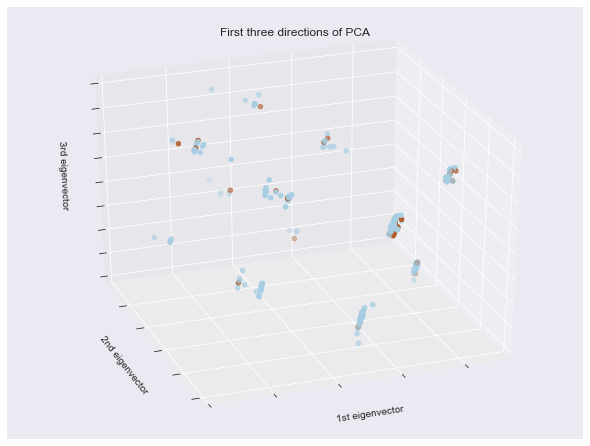

In [35]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2], c=label,cmap=plt.cm.Paired)
titel="First three directions of PCA" 
ax.set_title(titel)
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

# ISOMAP

In [36]:
from sklearn.manifold import Isomap
from sklearn.model_selection import train_test_split
isomap = Isomap(n_neighbors=5, n_components=3)
data_isomap = isomap.fit_transform(data)

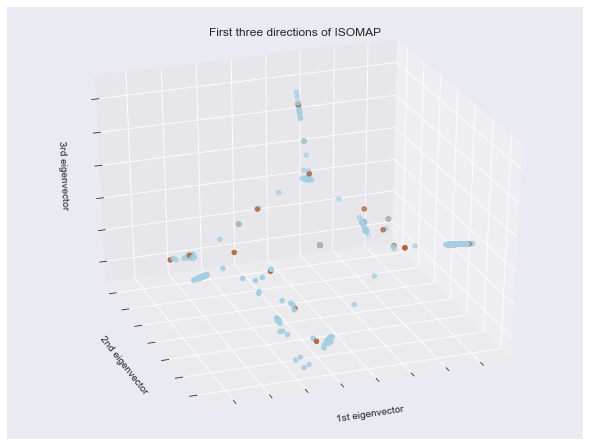

In [37]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(data_isomap[:, 0], data_isomap[:, 1], data_isomap[:, 2], c=label,cmap=plt.cm.Paired)
titel="First three directions of ISOMAP" 
ax.set_title(titel)
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

# TSNE

In [38]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, random_state=0)
data_tsne = tsne.fit_transform(data)

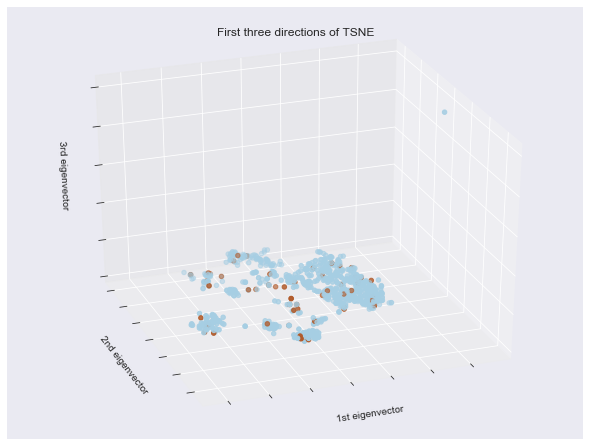

In [39]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(data_tsne[:, 0], data_tsne[:, 1], data_tsne[:, 2], c=label,cmap=plt.cm.Paired)
titel="First three directions of TSNE" 
ax.set_title(titel)
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

# After oversampling

In [40]:
#ros = RandomOverSampler(random_state=0)
ros = SMOTE(random_state=0)
# ros = ADASYN(random_state=0)
data, label = ros.fit_sample(data, label)

## PCA

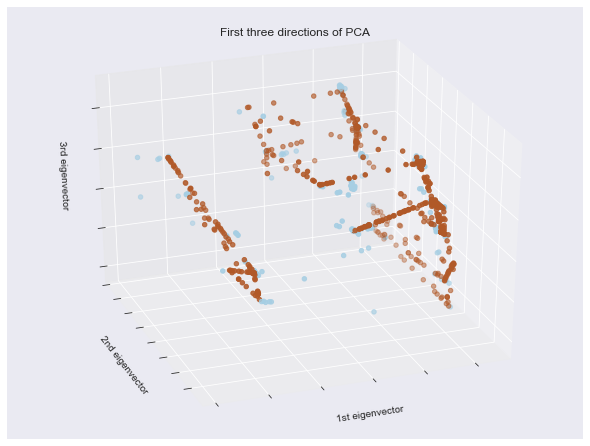

In [41]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(data)
data_pca = pca.transform(data)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2], c=label,cmap=plt.cm.Paired)
titel="First three directions of PCA" 
ax.set_title(titel)
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

## ISOMAP

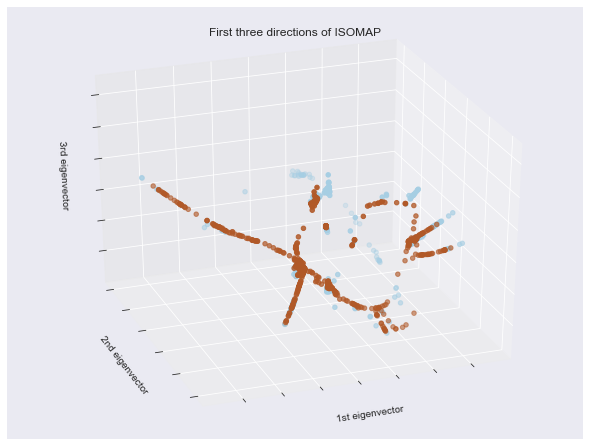

In [42]:
from sklearn.manifold import Isomap
from sklearn.model_selection import train_test_split
isomap = Isomap(n_neighbors=5, n_components=3)
data_isomap = isomap.fit_transform(data)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(data_isomap[:, 0], data_isomap[:, 1], data_isomap[:, 2], c=label,cmap=plt.cm.Paired)
titel="First three directions of ISOMAP" 
ax.set_title(titel)
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

## TSNE

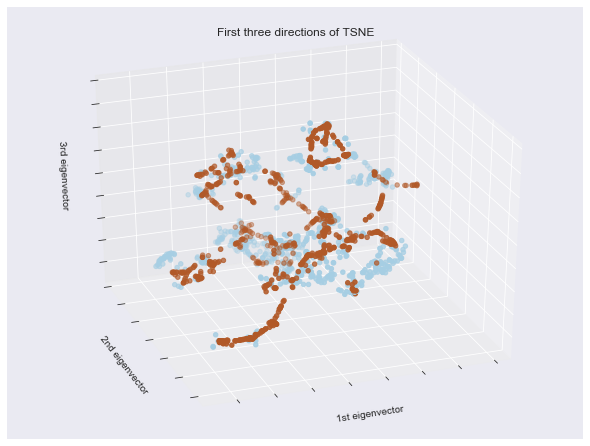

In [43]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, random_state=0)
data_tsne = tsne.fit_transform(data)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(data_tsne[:, 0], data_tsne[:, 1], data_tsne[:, 2], c=label,cmap=plt.cm.Paired)
titel="First three directions of TSNE" 
ax.set_title(titel)
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()